<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Introduction-to-Pycaret" data-toc-modified-id="Introduction-to-Pycaret-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to Pycaret</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Pycaret-Setup" data-toc-modified-id="Pycaret-Setup-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pycaret Setup</a></span></li><li><span><a href="#Comparing-All-Models" data-toc-modified-id="Comparing-All-Models-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Comparing All Models</a></span></li><li><span><a href="#Create-Models" data-toc-modified-id="Create-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Create Models</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Further-tuning" data-toc-modified-id="Further-tuning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Further tuning</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Ensemble--Modelling" data-toc-modified-id="Ensemble--Modelling-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Ensemble  Modelling</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Blending" data-toc-modified-id="Blending-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>Blending</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-14.4"><span class="toc-item-num">14.4&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li><li><span><a href="#Model-Calibration" data-toc-modified-id="Model-Calibration-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Model Calibration</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Model Interpretation</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Model Predictions</a></span></li><li><span><a href="#Model-Persistence" data-toc-modified-id="Model-Persistence-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Model Persistence</a></span></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

> The datasets contains transactions made by credit cards in September
2013 by european cardholders.


> This dataset presents transactions that occurred in two days,
where we have 492 frauds out of 284,807 transactions. 

> The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

> It contains only numerical input variables which are
the result of a PCA transformation.


> Unfortunately, due to confidentiality issues,
we cannot provide the original features and 
more background information about the data.


> Features V1, V2, ... V28 are the principal
components obtained with PCA,
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

> Feature 'Time' contains the seconds elapsed between each transaction
and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for 
example-dependant cost-senstive learning. 

> Feature 'Class' is the response variable and it takes value
1 in case of fraud and 0 otherwise.

# Business Problem

<div class="alert alert-block alert-success">
<b>Business Problem:</b>  <br>
Task &nbsp;&nbsp; : Detect the fraudulent activities. <br>
Metric : Recall <br>
Sampling: Synthetic Minority Over-Sampling Technique (SMOTE) <br>
Question: How many frauds are correctly classified?
</div>

# Imports

In [0]:
import time

time_start_notebook = time.time()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100

home = os.path.expanduser('~')

[(x.__name__,x.__version__) for x in [np,pd,sns]]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[('numpy', '1.18.4'), ('pandas', '1.0.4'), ('seaborn', '0.10.1')]

In [0]:
# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [10]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    !pip install catboost
    print('Environment: Google Colab')

     |████████████████████████████████| 64.8MB 68kB/s 
Environment: Google Colab


# Load the data

In [4]:
ifile = 'https://github.com/bhishanpdl/Datasets/blob/master/fraud_detection/creditcard.csv.zip?raw=true'
df = pd.read_csv(ifile,compression='zip')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
target = 'Class'
features = df.columns.drop(target)
df[target].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

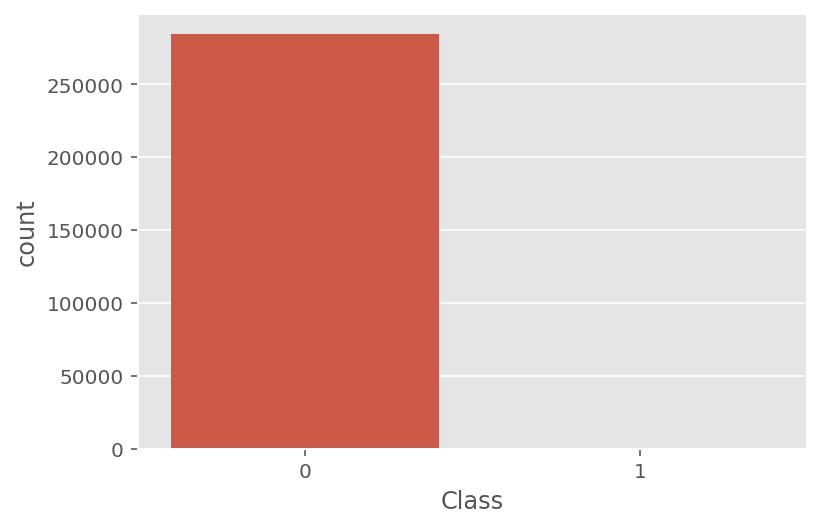

In [6]:
sns.countplot(df[target])

# Data Processing

# Train test split

In [7]:
from sklearn.model_selection import train_test_split

df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

ytrain_orig = ser_ytrain_orig.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

print(df_Xtrain_orig.shape)
df_Xtrain_orig.head()

(227845, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211885,138616.0,-1.137612,2.345154,-1.767247,0.833982,0.973168,-0.073571,0.802433,0.733137,-1.154087,-0.520340,0.494117,0.799935,0.494576,-0.479666,-0.917177,-0.184117,1.189459,0.937244,0.960749,0.062820,0.114953,0.430613,-0.240819,0.124011,0.187187,-0.402251,0.196277,0.190732,39.46
12542,21953.0,-1.028649,1.141569,2.492561,-0.242233,0.452842,-0.384273,1.256026,-0.816401,1.964560,-0.014216,0.432153,-2.140921,2.274477,0.114128,-1.652894,-0.617302,0.243791,-0.426168,-0.493177,0.350032,-0.380356,-0.037432,-0.503934,0.407129,0.604252,0.233015,-0.433132,-0.491892,7.19
270932,164333.0,-1.121864,-0.195099,1.282634,-3.172847,-0.761969,-0.287013,-0.586367,0.496182,-2.352349,0.350551,-1.319688,-0.942001,1.082210,-0.425735,0.036748,0.380392,-0.033353,0.204609,-0.801465,-0.113632,-0.328953,-0.856937,-0.056198,0.401905,0.406813,-0.440140,0.152356,0.030128,40.00
30330,35874.0,1.094238,-0.760568,-0.392822,-0.611720,-0.722850,-0.851978,-0.185505,-0.095131,-1.122304,0.367009,1.378493,-0.724216,-1.105406,-0.480170,0.220826,1.745743,0.740817,-0.728827,1.016740,0.354148,-0.227392,-1.254285,0.022116,-0.141531,0.114515,-0.652427,-0.037897,0.051254,165.85
272477,165107.0,2.278095,-1.298924,-1.884035,-1.530435,-0.649500,-0.996024,-0.466776,-0.438025,-1.612665,1.631133,-1.126000,-0.938760,0.300621,-0.119667,-0.585453,-1.106244,0.690235,-0.124401,-0.075649,-0.341708,0.123892,0.815909,-0.072537,0.784217,0.403428,0.193747,-0.043185,-0.058719,60.00


# Train Validation with stratify

In [8]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)


ytrain = ser_ytrain.to_numpy().ravel()
yvalid = ser_yvalid.to_numpy().ravel()

print(df_Xtrain.shape)

(182276, 30)


# Modelling

## Setup Models

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=None,
                           priors=None,
                           shrinkage=None,
                           solver='svd',
                           store_covariance=False,
                           tol=0.0001)

In [0]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


xgboost = XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='gbdt',
              colsample_by_tree=0.8040279979830232, colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.6183443388044544,
              max_delta_step=0, max_depth=7, min_child_weight=3.0, missing=None,
              n_estimators=150, n_jobs=-1, nthread=None, num_leaves=37,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.8254724276776704)

lightgbm_params = {'bagging_fraction': 0.5847570898839785,
 'bagging_freq': 3,
 'feature_fraction': 0.7941666171144979,
 'lambda_l1': 1.3871523892529368e-07,
 'lambda_l2': 0.44361819101899735,
 'min_child_samples': 55,
 'min_child_weight': 5.899155081455939,
 'num_leaves': 156,
 'subsample': 0.7122064897274488}
lightgbm = LGBMClassifier(random_state=SEED, **lightgbm_params)

catboost = CatBoostClassifier(verbose=False,random_state=100,
                            depth=6,
                            iterations=1_000,
                            )



In [0]:
# Stack up all the models
from mlxtend.classifier import StackingCVClassifier

stack = StackingCVClassifier(classifiers=(lda,xgboost, lightgbm, catboost),
                                meta_classifier=xgboost,
                                use_features_in_secondary=True)

# Fit the models

In [36]:
%%time
lda.fit(np.array(df_Xtrain),np.array(ser_ytrain));

CPU times: user 1.1 s, sys: 48.9 ms, total: 1.15 s
Wall time: 931 ms


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [37]:
%%time
xgboost.fit(np.array(df_Xtrain),np.array(ser_ytrain));

CPU times: user 1min 36s, sys: 52.6 ms, total: 1min 36s
Wall time: 49.1 s


XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='gbdt',
              colsample_by_tree=0.8040279979830232, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6183443388044544, max_delta_step=0, max_depth=7,
              min_child_weight=3.0, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, num_leaves=37, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.8254724276776704,
              verbosity=1)

In [38]:
%%time
lightgbm.fit(np.array(df_Xtrain),np.array(ser_ytrain));

CPU times: user 5.42 s, sys: 23.4 ms, total: 5.45 s
Wall time: 2.85 s


LGBMClassifier(bagging_fraction=0.5847570898839785, bagging_freq=3,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.7941666171144979, importance_type='split',
               lambda_l1=1.3871523892529368e-07, lambda_l2=0.44361819101899735,
               learning_rate=0.1, max_depth=-1, min_child_samples=55,
               min_child_weight=5.899155081455939, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=156, objective=None,
               random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.7122064897274488, subsample_for_bin=200000,
               subsample_freq=0)

In [39]:
%%time
catboost.fit(np.array(df_Xtrain),np.array(ser_ytrain));

CPU times: user 2min 33s, sys: 7.38 s, total: 2min 40s
Wall time: 1min 22s


In [33]:
%%time
stack.fit(np.array(df_Xtrain),np.array(ser_ytrain));

CPU times: user 10min 14s, sys: 18.5 s, total: 10min 33s
Wall time: 5min 24s


StackingCVClassifier(classifiers=(LinearDiscriminantAnalysis(n_components=None,
                                                             priors=None,
                                                             shrinkage=None,
                                                             solver='svd',
                                                             store_covariance=False,
                                                             tol=0.0001),
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                boosting_type='gbdt',
                                                colsample_by_tree=0.8040279979830232,
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                   

# Model Comparison

In [46]:
%%time
ypreds_lda = lda.predict(np.array(df_Xtest))
ypreds_xgboost = xgboost.predict(np.array(df_Xtest))
ypreds_lightgbm = lightgbm.predict(np.array(df_Xtest))
ypreds_catboost = catboost.predict(np.array(df_Xtest))
ypreds_stack = stack.predict(np.array(df_Xtest))

CPU times: user 2.29 s, sys: 173 ms, total: 2.47 s
Wall time: 1.28 s


In [0]:
ytest = np.array(ser_ytest).ravel()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

ypreds = [ypreds_lda, ypreds_xgboost, ypreds_lightgbm,ypreds_catboost,ypreds_stack]
model_names = ['lda','xgboost','lightgbm','catboost','stack']
wrong_frauds = [confusion_matrix(ytest,ypred)[1,0] for ypred in ypreds]
accuracies = [accuracy_score(ytest,ypred) for ypred in ypreds]
precisions = [precision_score(ytest,ypred) for ypred in ypreds]
recalls = [recall_score(ytest,ypred) for ypred in ypreds]
f1_scores = [f1_score(ytest,ypred) for ypred in ypreds]

df_eval = pd.DataFrame({'Model': model_names,
                        'WrongFrauds': wrong_frauds,
                        'Accuracy': accuracies,
                        'Precision': precisions,
                        'Recall': recalls,
                        'F1-score': f1_scores})


df_eval = df_eval.sort_values('Recall',ascending=False)
df_eval

,Model,WrongFrauds,Accuracy,Precision,Recall,F1-score
2,lightgbm,19,0.999596,0.951807,0.806122,0.872928
1,xgboost,20,0.999614,0.975000,0.795918,0.876404
4,stack,20,0.999614,0.975000,0.795918,0.876404
3,catboost,22,0.999561,0.962025,0.775510,0.858757
0,lda,25,0.999333,0.848837,0.744898,0.793478


In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,ypreds_stack)
print(cm)

[[56862     2]
 [   20    78]]


In [50]:
wrong_frauds = cm[1,0]
wrong_frauds

20